In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import glob
import seaborn as sns
from scipy import signal
from numpy.fft import fft, fftshift
from scipy import signal
import random
# uncomment this to plot separately
#%matplotlib tk

In [2]:
# Read the files from the directory
climb_filenames = glob.glob('Climb_stairs/*.txt')
descend_filenames = glob.glob('Descend_stairs/*.txt')
walk_filenames = glob.glob('Walk/*.txt')

# Shuffle the order of filenames
random.shuffle(climb_filenames)
random.shuffle(descend_filenames)
random.shuffle(walk_filenames)
climb_filenames = np.array(climb_filenames)
descend_filenames = np.array(descend_filenames)
walk_filenames = np.array(walk_filenames)

In [3]:
## Split data into training and testing
train_climb_filenames = climb_filenames[0:int(0.7*climb_filenames.shape[0])]
test_climb_filenames = climb_filenames[int(0.7*climb_filenames.shape[0]):len(climb_filenames)]
train_descend_filenames = descend_filenames[0:int(0.7*descend_filenames.shape[0])]
test_descend_filenames = descend_filenames[int(0.7*descend_filenames.shape[0]):len(descend_filenames)]
train_walk_filenames = walk_filenames[0:int(0.7*walk_filenames.shape[0])]
test_walk_filenames = walk_filenames[int(0.7*walk_filenames.shape[0]):len(walk_filenames)]

In [4]:
def get_accelerometer_data(filenames, x, y, z):
    for f in filenames:
        with open(f,'r') as file:
            line_array = file.readlines()
            for l_string in line_array:
                l_array = l_string.split()
                x.append(int(l_array[0]))
                y.append(int(l_array[1]))
                z.append(int(l_array[2]))      

In [5]:
# Read the xyz values for the training and the testing data
climb_x_train = []
climb_y_train = []
climb_z_train = []
descend_x_train = []
descend_y_train = []
descend_z_train = []
walk_x_train = []
walk_y_train = []
walk_z_train = []

get_accelerometer_data(train_climb_filenames, climb_x_train, climb_y_train, climb_z_train)
get_accelerometer_data(train_descend_filenames, descend_x_train, descend_y_train, descend_z_train)
get_accelerometer_data(train_walk_filenames, walk_x_train, walk_y_train, walk_z_train)
climb_x_train = np.array(climb_x_train)
climb_y_train = np.array(climb_y_train)
climb_z_train = np.array(climb_z_train)
descend_x_train = np.array(descend_x_train)
descend_y_train = np.array(descend_y_train)
descend_z_train = np.array(descend_z_train)
walk_x_train = np.array(walk_x_train)
walk_y_train = np.array(walk_y_train)
walk_z_train = np.array(walk_z_train)

climb_x_test = []
climb_y_test = []
climb_z_test = []
descend_x_test = []
descend_y_test = []
descend_z_test = []
walk_x_test = []
walk_y_test = []
walk_z_test = []

get_accelerometer_data(test_climb_filenames, climb_x_test, climb_y_test, climb_z_test)
get_accelerometer_data(test_descend_filenames, descend_x_test, descend_y_test, descend_z_test)
get_accelerometer_data(test_walk_filenames, walk_x_test, walk_y_test, walk_z_test)
climb_x_test = np.array(climb_x_test)
climb_y_test = np.array(climb_y_test)
climb_z_test = np.array(climb_z_test)
descend_x_test = np.array(descend_x_test)
descend_y_test = np.array(descend_y_test)
descend_z_test = np.array(descend_z_test)
walk_x_test = np.array(walk_x_test)
walk_y_test = np.array(walk_y_test)
walk_z_test = np.array(walk_z_test)

In [6]:
def show_output_xyz(x, y, z, titlex, titley, titlez):
    # Raw data output of the climb stairs
    fig, axs = plt.subplots(3,1, figsize=(10,10))
    plt.subplots_adjust(hspace=0.5)
    axs[0].plot(x)
    axs[0].set_title(titlex)
    axs[0].set_xlabel('Samples')
    axs[0].set_ylabel('A[m/s^2]')
    axs[1].plot(y)
    axs[1].set_title(titley)
    axs[1].set_xlabel('Samples')
    axs[1].set_ylabel('A[m/s^2]')
    axs[2].plot(z)
    axs[2].set_title(titlez)
    axs[2].set_xlabel('Samples')
    axs[2].set_ylabel('A[m/s^2]')
    plt.show()

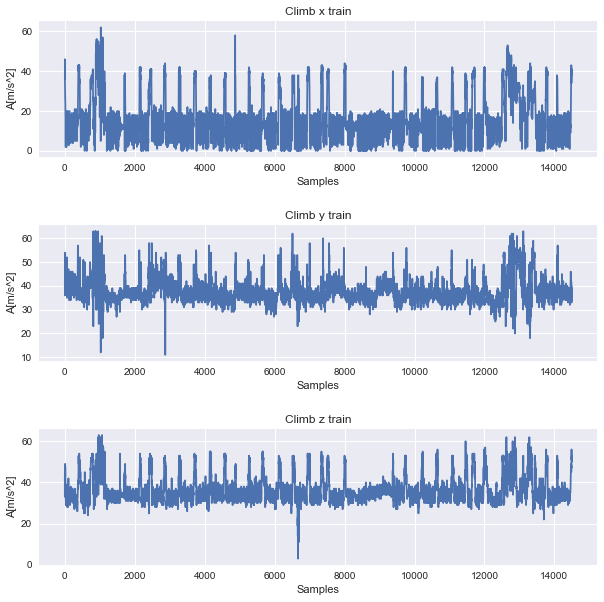

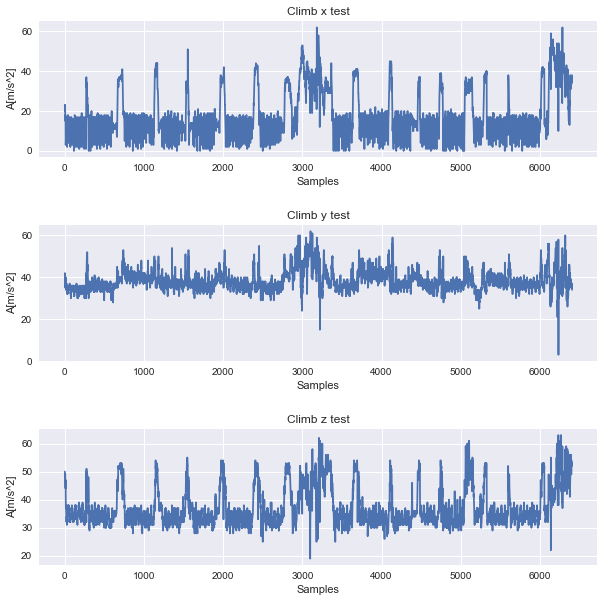

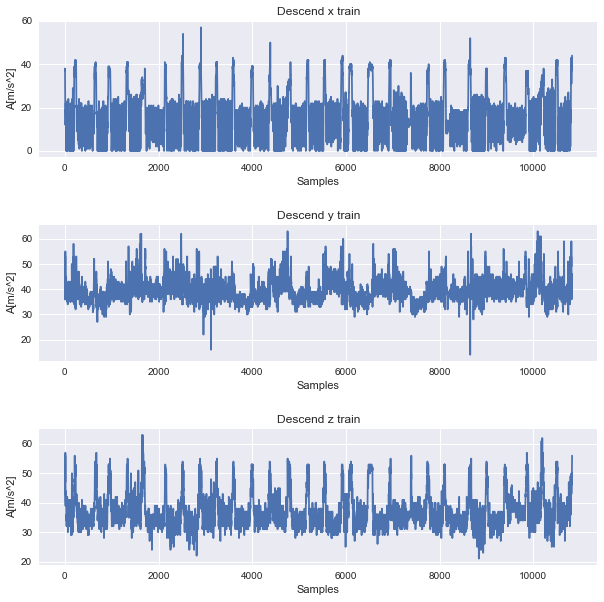

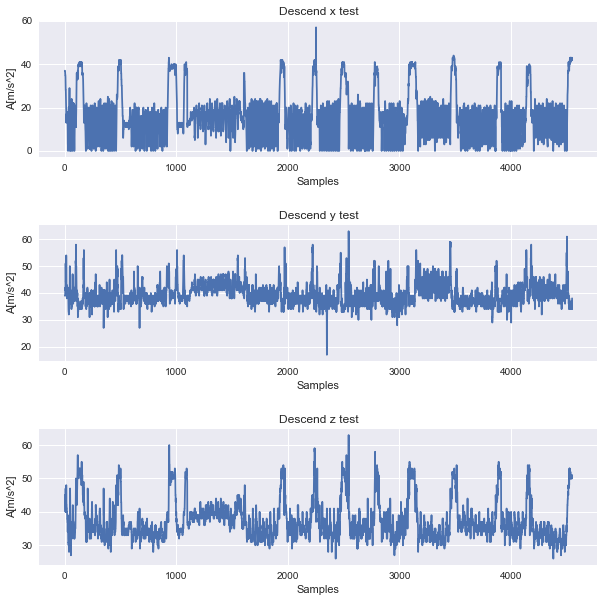

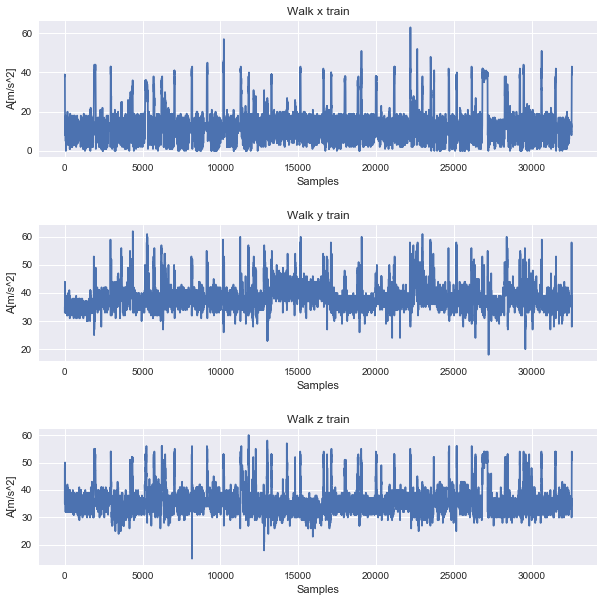

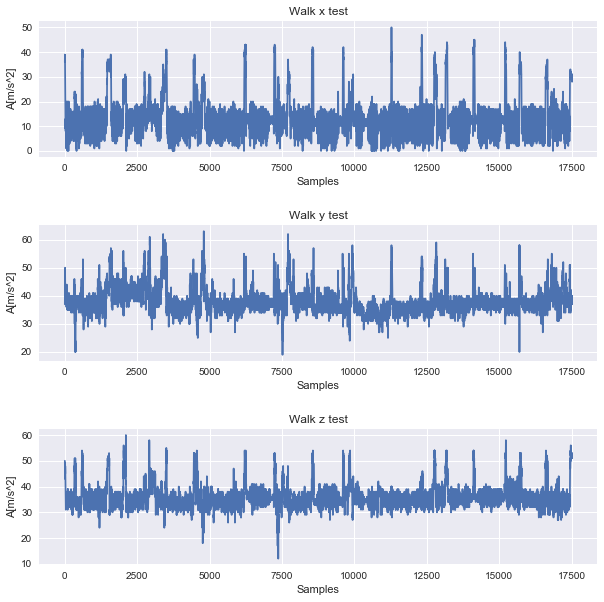

In [7]:
show_output_xyz(climb_x_train, climb_y_train, climb_z_train, "Climb x train", "Climb y train", "Climb z train")
show_output_xyz(climb_x_test, climb_y_test, climb_z_test, "Climb x test", "Climb y test", "Climb z test")

show_output_xyz(descend_x_train, descend_y_train, descend_z_train, "Descend x train", "Descend y train", "Descend z train")
show_output_xyz(descend_x_test, descend_y_test, descend_z_test, "Descend x test", "Descend y test", "Descend z test")

show_output_xyz(walk_x_train, walk_y_train, walk_z_train, "Walk x train", "Walk y train", "Walk z train")
show_output_xyz(walk_x_test, walk_y_test, walk_z_test, "Walk x test", "Walk y test", "Walk z test")

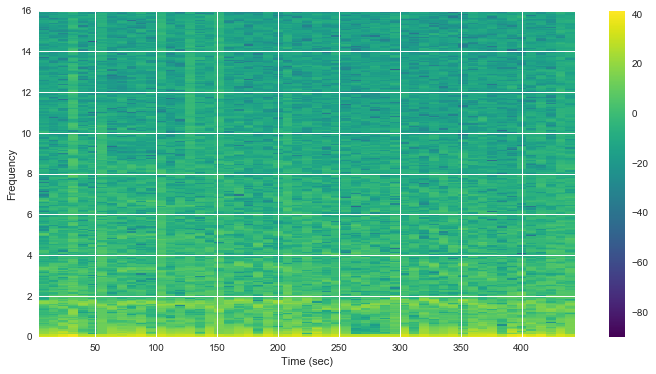

In [9]:
#plt.subplot(111)
plt.subplots(1,1, figsize=(12,6))
NFFT=512
noverlap = int(0.50*NFFT)
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(climb_x_train, Fs=32, NFFT=NFFT, noverlap=noverlap, window=np.hamming(NFFT),cmap='viridis')
plt.xlabel('Time (sec)')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

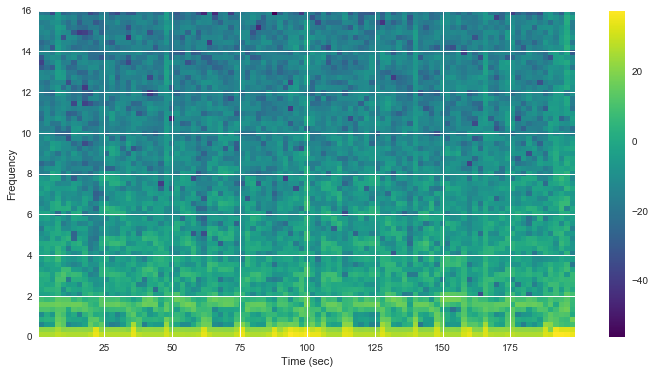

In [10]:
plt.subplots(1,1, figsize=(12,6))
NFFT=128
noverlap = int(0.50*NFFT)
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(climb_x_test, Fs=32, NFFT=NFFT, noverlap=noverlap, window=np.hamming(NFFT),cmap='viridis')
plt.xlabel('Time (sec)')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

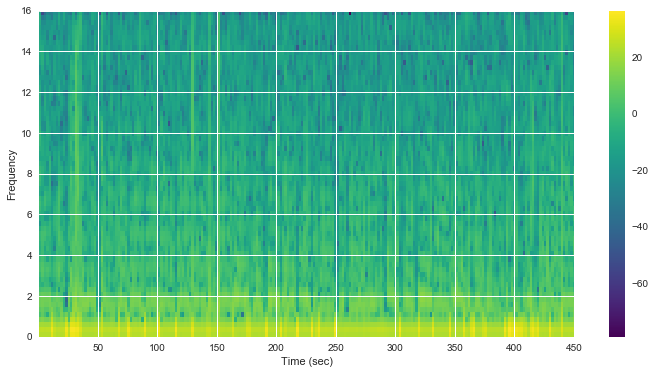

In [11]:
plt.subplots(1,1, figsize=(12,6))
NFFT=128
noverlap = int(0.50*NFFT)
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(climb_x_train, Fs=32, NFFT=NFFT, noverlap=noverlap, window=signal.gaussian(NFFT,std=12),cmap='viridis')
plt.xlabel('Time (sec)')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

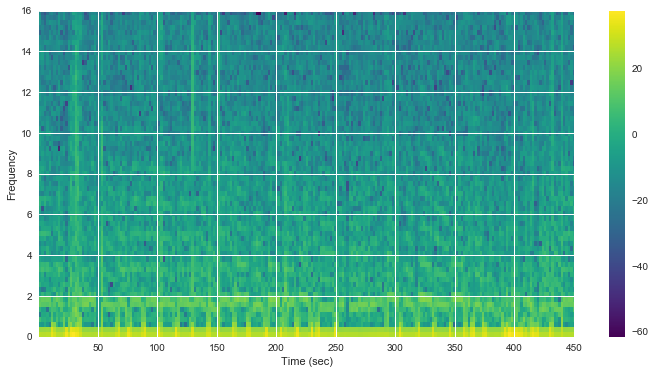

In [12]:
plt.subplots(1,1, figsize=(12,6))
NFFT=128
noverlap = int(0.50*NFFT)
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(climb_x_train, Fs=32, NFFT=NFFT, noverlap=noverlap, window=np.kaiser(NFFT,5),cmap='viridis')
plt.xlabel('Time (sec)')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
def new_display_fft(signal, sampling_freq, title):
    N = signal.shape[0]
    T = 1.0 / sampling_freq
    x = np.linspace(0, N*T, N)
    y = signal
    yf = fft(signal)
    f_s = sampling_freq
    yf = np.abs(yf) * 2.0 / N  # Normalize the wave
    #xf = np.linspace(0, 1 / (2.0*T), N)
    xf = fftpack.fftfreq(len(signal)) * f_s
    fig, ax = plt.subplots()
    plt.title(title)
    ax.set_xlim(0, sampling_freq / 2)
    ax.plot(xf,yf)
    plt.show()

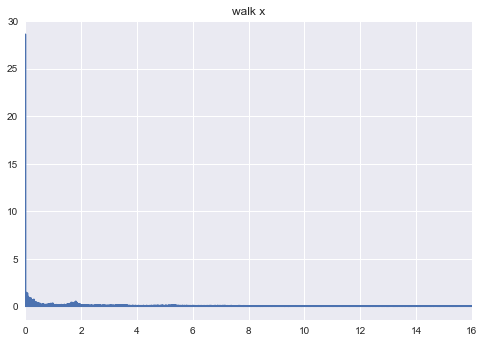

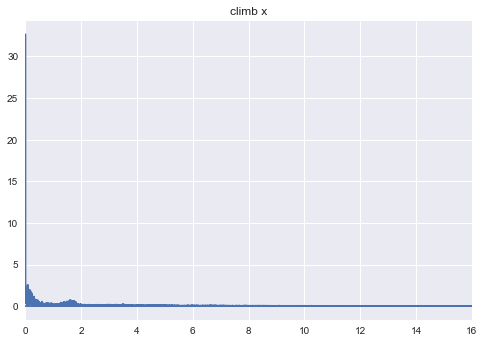

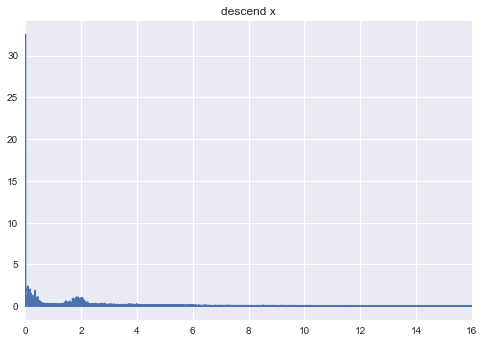

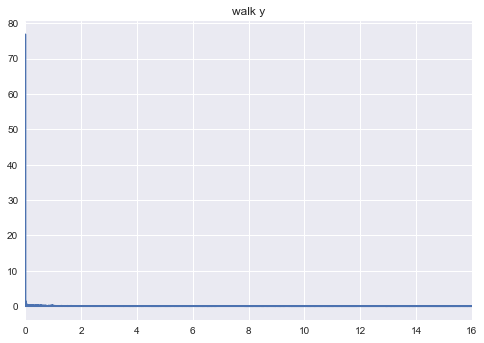

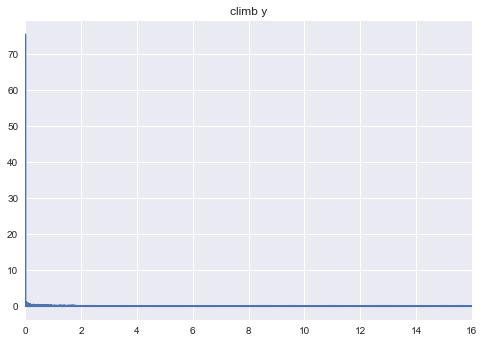

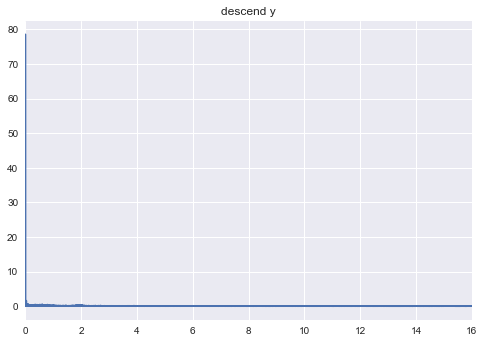

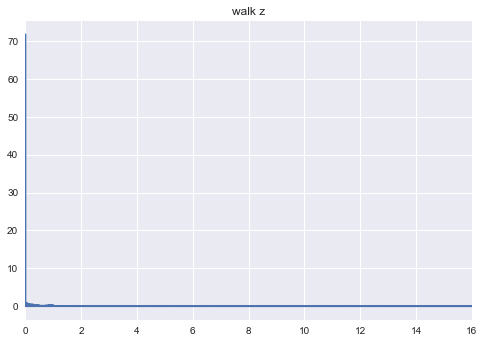

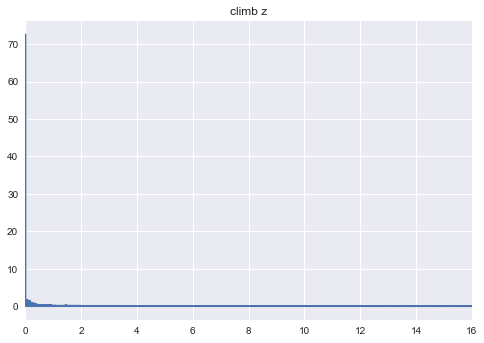

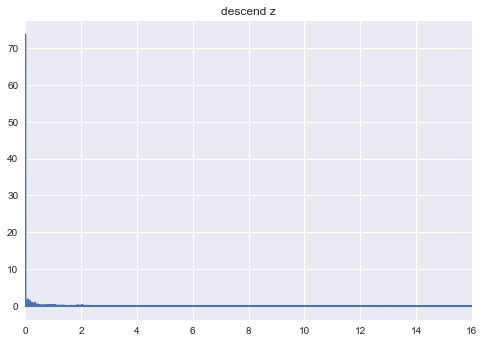

In [17]:
new_display_fft(walk_x_train, 32.0, "walk x")
new_display_fft(climb_x_train, 32.0, "climb x")
new_display_fft(descend_x_train, 32.0, "descend x")
new_display_fft(walk_y_train, 32.0, "walk y")
new_display_fft(climb_y_train, 32.0, "climb y")
new_display_fft(descend_y_train, 32.0, "descend y")
new_display_fft(walk_z_train, 32.0, "walk z")
new_display_fft(climb_z_train, 32.0, "climb z")
new_display_fft(descend_z_train, 32.0, "descend z")

In [18]:
## Filter design
import scipy.signal
import matplotlib.pyplot as plt
import numpy as np
from math import pi

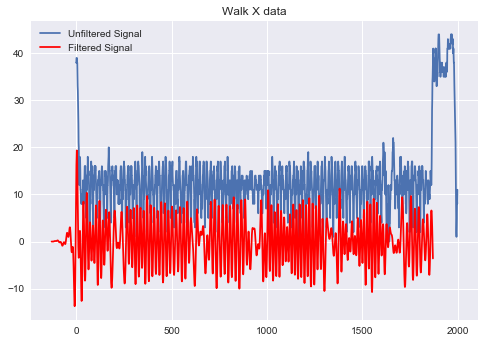

In [19]:
from scipy.signal import firwin, lfilter
def bandpass_filter(signal, sample_rate, low_f, high_f, numt):
    nyq_rate = sample_rate / 2.
    # The cutoff frequency of the filter: 6KHz
    low_f = low_f / (sample_rate * 2)
    high_f = high_f / (sample_rate * 2)
    numtaps = numt
    delay = 0.5 * numtaps
    # Use firwin to create a lowpass FIR filter
    fir_coeff = firwin(numtaps, [low_f, high_f],pass_zero=False)
    # Use lfilter to filter the signal with the FIR filter
    filtered_signal = lfilter(fir_coeff, 1.0, signal)
    return filtered_signal, delay

newx, delay = bandpass_filter(descend_x_train, 32.0, 2.0, 8.0, 257)

plt.plot(walk_x_train[0:2000], label='Unfiltered Signal')
t = np.arange(len(walk_x_train[0:2000]))
plt.plot((t-delay)[0:2000], newx[0:2000], '-r', label='Filtered Signal')
plt.title("Walk X data")
plt.legend()
plt.show()

In [21]:
## Collect the filtered data
filtered_climb_x_train, delay = bandpass_filter(climb_x_train, 32.0, 0.5, 8.0, 257)
filtered_climb_y_train, delay = bandpass_filter(climb_y_train, 32.0, 0.5, 4.0, 257)
filtered_climb_z_train, delay = bandpass_filter(climb_z_train, 32.0, 0.5, 6.0, 257)

filtered_descend_x_train, delay = bandpass_filter(descend_x_train, 32.0, 0.5, 8.0, 257)
filtered_descend_y_train, delay = bandpass_filter(descend_y_train, 32.0, 0.5, 4.0, 257)
filtered_descend_z_train, delay = bandpass_filter(descend_z_train, 32.0, 0.5, 4.0, 257)

filtered_walk_x_train, delay = bandpass_filter(walk_x_train, 32.0, 0.5, 8.0, 257)
filtered_walk_y_train, delay = bandpass_filter(walk_y_train, 32.0, 0.5, 2.0, 257)
filtered_walk_z_train, delay = bandpass_filter(walk_z_train, 32.0, 0.5, 4.0, 257)

In [22]:
print(climb_x_train)
print(filtered_climb_x_train)

[36 36 46 ..., 39 40 38]
[ -1.49099755e-17  -2.94448219e-03  -8.48405394e-03 ...,   6.29668407e+00
   6.75635742e+00   6.63727333e+00]


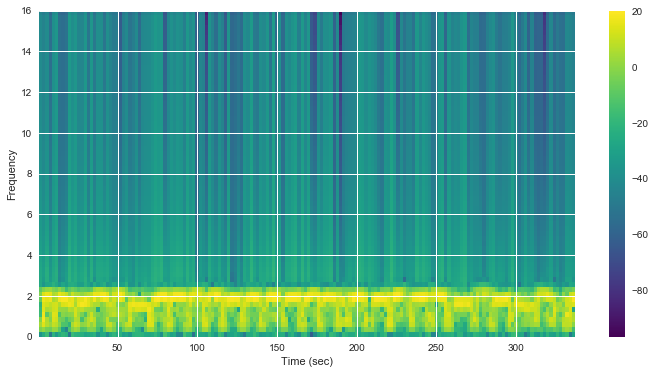

In [23]:
#plt.subplot(111)
plt.subplots(1,1, figsize=(12,6))
NFFT=128
noverlap = int(0.50*NFFT)
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(newx, Fs=32, NFFT=NFFT, noverlap=noverlap, window=np.hamming(NFFT),cmap='viridis')
plt.xlabel('Time (sec)')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

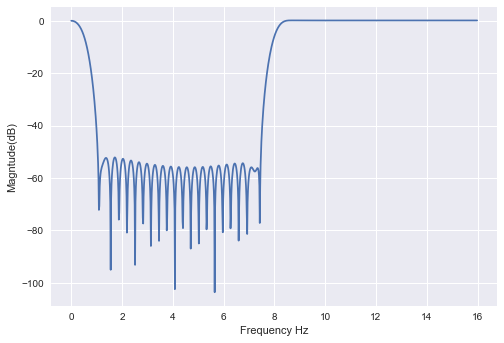

In [25]:
N = 101 # Number of coefficients
Fs = 32
low_f = 0.5
high_f = 8.0
w_clow = 2 * low_f / Fs
w_chigh = 2 * high_f / Fs
t = signal.firwin(N,[w_clow, w_chigh])
[w, h] = signal.freqz(t, worN = 1000)
w = Fs * w / (2*pi)
h_db =  20*np.log10(abs(h))
plt.figure()
plt.plot(w, h_db)
plt.xlabel("Frequency Hz")
plt.ylabel("Magntude(dB)")
plt.grid('on')
plt.show()

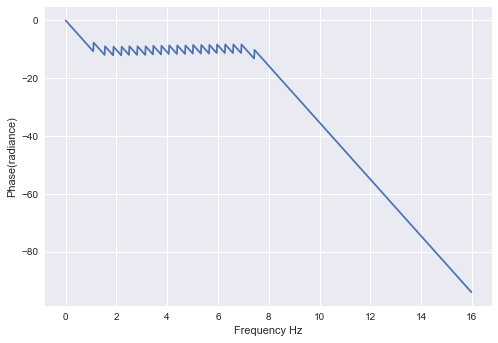

In [26]:
N = 101 # Number of coefficients
Fs = 32
low_f = 0.5
high_f = 8
w_clow = 2 * low_f / Fs
w_chigh = 2 * high_f / Fs
t = signal.firwin(N,[w_clow, w_chigh])
[w, h] = signal.freqz(t, worN = 1000)
w = Fs * w / (2*pi)
h_phase = np.unwrap(np.arctan2(np.imag(h),np.real(h)))
plt.figure()
plt.plot(w, h_phase)
plt.xlabel("Frequency Hz")
plt.ylabel("Phase(radiance)")
plt.grid('on')
plt.show()

In [27]:
print(len(filtered_climb_x_train))
print(len(filtered_climb_y_train))
print(len(filtered_climb_z_train))

14507
14507
14507


In [28]:
print(len(filtered_descend_x_train))
print(len(filtered_descend_y_train))
print(len(filtered_descend_z_train))

10827
10827
10827


In [29]:
print(len(filtered_walk_x_train))
print(len(filtered_walk_y_train))
print(len(filtered_walk_z_train))

32590
32590
32590


In [ ]:
# Save training data for climbing activity
f = open("climb_train.txt","w")
x_max = max(filtered_climb_x_train)
y_max = max(filtered_climb_y_train)
z_max = max(filtered_climb_z_train)
for i in range(len(filtered_climb_x_train)):
    line = str(filtered_climb_x_train[i]/x_max) + " " + str(filtered_climb_y_train[i]/y_max) + " " + str(filtered_climb_z_train[i]/z_max) + " " + str(0) + "\n"
    f.write(line)
f.close()

In [ ]:
# Save training data for descending activity
f = open("descend_train.txt","w")
x_max = max(filtered_descend_x_train)
y_max = max(filtered_descend_y_train)
z_max = max(filtered_descend_z_train)
for i in range(len(filtered_descend_x_train)):
    line = str(filtered_descend_x_train[i]/x_max) + " " + str(filtered_descend_y_train[i]/y_max) + " " + str(filtered_descend_z_train[i]/z_max) + " " + str(1) + "\n"
    f.write(line)
f.close()

In [ ]:
# Save training data for descending activity
f = open("walk_train.txt","w")
x_max = max(filtered_walk_x_train)
y_max = max(filtered_walk_y_train)
z_max = max(filtered_walk_z_train)
for i in range(len(filtered_walk_x_train)):
    line = str(filtered_walk_x_train[i]/x_max) + " " + str(filtered_walk_y_train[i]/y_max) + " " + str(filtered_walk_z_train[i]/z_max) + " " + str(2) + "\n"
    f.write(line)
f.close()

In [ ]:


filtered_climb_x_test, delay = bandpass_filter(climb_x_test, 32.0, 0.5, 8.0, 257)
filtered_climb_y_test, delay = bandpass_filter(climb_y_test, 32.0, 0.5, 4.0, 257)
filtered_climb_z_test, delay = bandpass_filter(climb_z_test, 32.0, 0.5, 6.0, 257)

filtered_descend_x_test, delay = bandpass_filter(descend_x_test, 32.0, 0.5, 8.0, 257)
filtered_descend_y_test, delay = bandpass_filter(descend_y_test, 32.0, 0.5, 4.0, 257)
filtered_descend_z_test, delay = bandpass_filter(descend_z_test, 32.0, 0.5, 4.0, 257)

filtered_walk_x_test, delay = bandpass_filter(walk_x_test, 32.0, 0.5, 8.0, 257)
filtered_walk_y_test, delay = bandpass_filter(walk_y_test, 32.0, 0.5, 2.0, 257)
filtered_walk_z_test, delay = bandpass_filter(walk_z_test, 32.0, 0.5, 4.0, 257)

In [ ]:
# Save testing data for climbing activity
f = open("climb_test.txt","w")
x_max = max(filtered_climb_x_test)
y_max = max(filtered_climb_y_test)
z_max = max(filtered_climb_z_test)
for i in range(len(filtered_climb_x_test)):
    line = str(filtered_climb_x_test[i]/x_max) + " " + str(filtered_climb_y_test[i]/y_max) + " " + str(filtered_climb_z_test[i]/z_max) + " " + str(0) + "\n"
    f.write(line)
f.close()

In [ ]:
# Save training data for descending activity
f = open("descend_test.txt","w")
x_max = max(filtered_descend_x_test)
y_max = max(filtered_descend_y_test)
z_max = max(filtered_descend_z_test)
for i in range(len(filtered_descend_x_test)):
    line = str(filtered_descend_x_test[i]/x_max) + " " + str(filtered_descend_y_test[i]/y_max) + " " + str(filtered_descend_z_test[i]/z_max) + " " + str(1) + "\n"
    f.write(line)
f.close()

In [ ]:
# Save training data for descending activity
f = open("walk_test.txt","w")
x_max = max(filtered_walk_x_test)
y_max = max(filtered_walk_y_test)
z_max = max(filtered_walk_z_test)
for i in range(len(filtered_walk_x_test)):
    line = str(filtered_walk_x_test[i]/x_max) + " " + str(filtered_walk_y_test[i]/y_max) + " " + str(filtered_walk_z_test[i]/z_max) + " " + str(2) + "\n"
    f.write(line)
f.close()